In [ ]:
!mkdir Airsim
!cp ./drive/Shareddrives/Sam/Datasets/AirSim.zip ./sample_data/

In [ ]:
!unzip ./sample_data/AirSim.zip -d ./Airsim/

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw


DATA_PATH = './Airsim'

In [ ]:
folders = os.listdir(DATA_PATH)
folders.sort()

In [ ]:
path = os.path.join(DATA_PATH, folders[0], 'airsim_rec.txt')
samples = pd.read_csv(path, sep='\t')
samples.head(-5)

VehicleName      TimeStamp      POS_X      POS_Y     POS_Z       Q_W  \
0     PhysXCar  1646315567453  -0.000002  -0.000024 -0.582521  1.000000   
1     PhysXCar  1646315567998  -0.000002  -0.000024 -0.582231  1.000000   
2     PhysXCar  1646315568497   0.003413   0.002718 -0.582149  0.999999   
3     PhysXCar  1646315568961   0.036250   0.020646 -0.582194  0.999960   
4     PhysXCar  1646315569478   0.103286   0.042598 -0.582241  0.999843   
..         ...            ...        ...        ...       ...       ...   
84    PhysXCar  1646315602946  79.286800 -11.363700 -0.586541  0.784284   
85    PhysXCar  1646315603329  79.553300 -12.710100 -0.586601  0.758127   
86    PhysXCar  1646315603717  79.710700 -14.088300 -0.586680  0.730868   
87    PhysXCar  1646315604113  79.757100 -15.491700 -0.586754  0.702449   
88    PhysXCar  1646315604513  79.713200 -16.917000 -0.586806  0.679789   

         Q_X           Q_Y           Q_Z  Throttle  Steering  Brake  Gear  \
0   0.000031 -8.214780e-12 -2.663160e-07    0.5780   1.25000    0.0     0   
1   0.000031 -8.214780e-12 -2.663160e-07    0.5705   1.25000    0.0     1   
2  -0.000166  1.881520e-04  1.197690e-03    0.5705   1.25000    0.0     1   
3  -0.000879  8.431870e-04  8.899460e-03    1.0000   0.16000    0.0     1   
4  -0.000979  1.313370e-03  1.763320e-02    1.0000  -0.24375    0.0     1   
..       ...           ...           ...       ...       ...    ...   ...   
84  0.020449 -1.596240e-02 -6.198590e-01    1.0000  -0.62500    0.0     0   
85  0.019075 -1.593200e-02 -6.516330e-01    1.0000  -0.63500    0.0     3   
86  0.018192 -1.610630e-02 -6.820870e-01    1.0000  -0.63500    0.0     3   
87  0.017521 -1.644010e-02 -7.113280e-01    1.0000   0.00000    0.0     3   
88  0.016175 -1.558200e-02 -7.330640e-01    1.0000   0.15000    0.0     3   

    Handbrake      RPM         Speed                                ImageFile  
0           0  2024.01  7.282090e-08  img_PhysXCar__0_1646315567435787000.png  
1           0  1808.79  7.998550e-04  img_PhysXCar__0_1646315567997581400.png  
2           0  1716.20  2.219290e-01  img_PhysXCar__0_1646315568478660900.png  
3           0  1695.16  5.412350e-01  img_PhysXCar__0_1646315568960573300.png  
4           0  1953.83  9.172910e-01  img_PhysXCar__0_1646315569476890000.png  
..        ...      ...           ...                                      ...  
84          0  4780.73  1.375870e+01  img_PhysXCar__0_1646315602945612100.png  
85          0  4331.75  1.383680e+01  img_PhysXCar__0_1646315603328267700.png  
86          0  4321.09  1.401050e+01  img_PhysXCar__0_1646315603715567200.png  
87          0  4311.18  1.418880e+01  img_PhysXCar__0_1646315604112649500.png  
88          0  4273.71  1.444230e+01  img_PhysXCar__0_1646315604512217000.png  

[89 rows x 17 columns]

In [ ]:
image_paths = samples['ImageFile'].to_numpy()

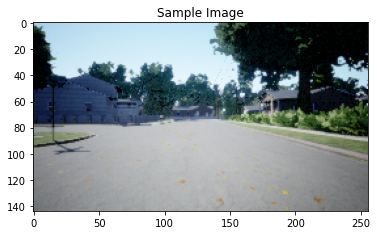

In [ ]:
sample_image_path = os.path.join(DATA_PATH, folders[0], 'images/' + image_paths[70])
sample_image = Image.open(sample_image_path)
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()

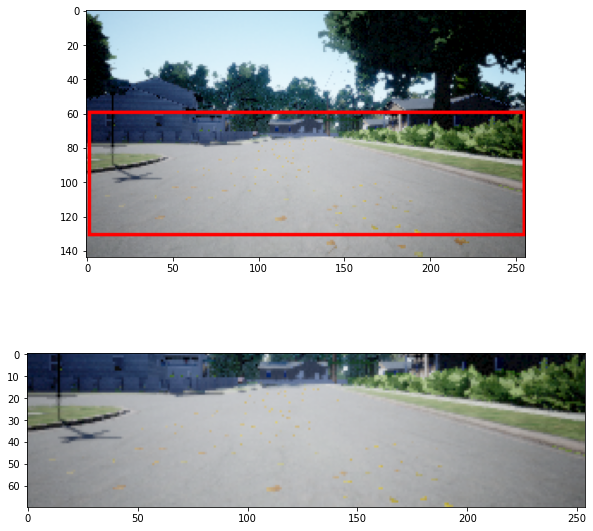

In [ ]:
image2 = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(image2)
points = [(1,60), (1,130), (255,130), (255,60)]
for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=2)
del draw

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.imshow(image2)
ax2.imshow(np.array(sample_image)[60:130, 1:255, :])
plt.show()

In [ ]:
def remove_alpha_channel(image):
    img = image.copy()
    return img[:, :, 0:3]

In [ ]:
def image_normalization(image):
    return image

In [ ]:
def region_of_interest(image):
    img = image.copy()
    return img[60:130, 1:255]

In [ ]:
def quaternion_to_euler(q_x, q_y, q_z, q_w):
        # t0 = +2.0 * (q_w * q_x + q_y * q_z)
        # t1 = +1.0 - 2.0 * (q_x * q_x + q_y * q_y)
        # roll_x = np.arctan2(t0, t1)
     
        # t2 = +2.0 * (q_w * q_y - q_z * q_x)
        # np.clip(t2, -1.0, +1.0)
        # pitch_y = np.arcsin(t2)
     
        t3 = +2.0 * (q_w * q_z + q_x * q_y)
        t4 = +1.0 - 2.0 * (q_y * q_y + q_z * q_z)
        yaw_z = np.arctan2(t3, t4)
     
        return None, None, yaw_z

In [ ]:
def normalize_points(set_of_points, z_rotate, len=20.0):
    s = set_of_points - set_of_points[0]
    R = np.array([[np.cos(z_rotate), -np.sin(z_rotate)],
                  [np.sin(z_rotate), np.cos(z_rotate)]])
    s = s @ R
    s /= len
    return s

In [ ]:
def normalize_controls(speeds, steerings):
    return speeds/30.0, steerings/1.25

In [ ]:
def smooth(points, box_pts):
    box = np.ones(box_pts)/box_pts
    points_smooth = np.convolve(points, box, mode='same')
    return points_smooth

In [ ]:
n = 10

In [ ]:
def generate_train_object(folder_path):
    rec_path = os.path.join(DATA_PATH, folder_path, 'airsim_rec.txt')
    samples = pd.read_csv(rec_path, sep='\t')
    size = len(samples)

    local_image_paths = samples['ImageFile'].to_numpy()
    speeds = samples['Speed'].to_numpy()
    steerings = samples['Steering'].to_numpy()
    speeds, steerings = normalize_controls(speeds, steerings)

    steerings = smooth(steerings, 3)
    brakes = smooth(samples['Brake'].to_numpy(),3)
    throttles = smooth(samples['Throttle'].to_numpy(),3)
    controls = np.vstack((speeds, throttles, steerings, brakes)).T

    Xs = samples["POS_X"].to_numpy()
    Ys = samples["POS_Y"].to_numpy()
    # Zs = samples["POS_Z"].to_numpy()
    Xs = np.append(Xs, np.repeat(Xs[-1], n))
    Ys = np.append(Ys, np.repeat(Ys[-1], n))
    points = np.vstack((Xs,Ys)).T

    QWs = samples["Q_W"].to_numpy()
    QXs = samples["Q_X"].to_numpy()
    QYs = samples["Q_Y"].to_numpy()
    QZs = samples["Q_Z"].to_numpy()
    _, _, yaw = quaternion_to_euler(QXs, QYs, QZs, QWs)

    array = np.empty(size-1, dtype=object)
    for i in range(1,size):
        img_path = os.path.join(DATA_PATH, folder_path, 'images/' + local_image_paths[i])
        img = Image.open(img_path)
        image_array = np.array(img)
        ## preprocess
        image_array = remove_alpha_channel(image_array)
        image_array = image_normalization(image_array)
        image_array = region_of_interest(image_array)

        ctrls = controls[i-1]
        pts = normalize_points(points[i:i+1+n], yaw[i])[1:]

        array[i-1] = (image_array, ctrls, pts)

    return array


In [ ]:
arr = generate_train_object(folders[0])

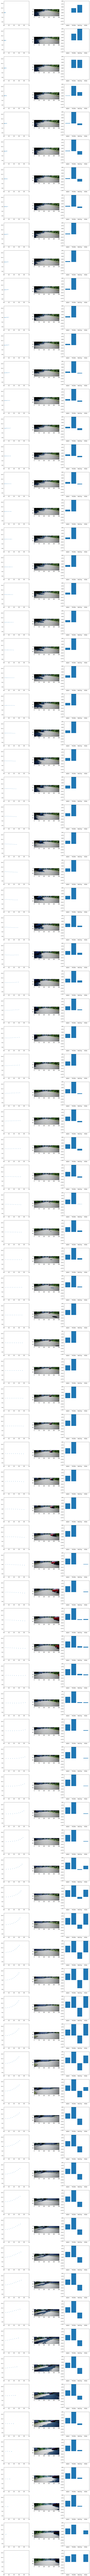

In [ ]:
l = len(arr)
fig, axes = plt.subplots(l, 3, figsize=(15, l * 5))

for i, (ax1, img_ax, ax2) in enumerate(axes):
    image_array, ctrls, pts = arr[i]
    ax1.scatter(pts[:,0], pts[:,1], s=5)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0.5, -0.5)

    img_ax.imshow(image_array)

    fields = ['Speed', 'Throttle', 'Steering', 'Brake']
    ax2.bar(fields, ctrls)
    ax2.set_ylim(-1, 1)

In [ ]:
with open('test.npy', 'wb') as f:
    np.save(f, arr)